In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [37]:
df = pd.read_csv('/Users/nirajanpaudel17/Documents/Python/Python NoteBooks/Practice files/datasets/heart_diseases.csv')

In [38]:
df.shape

(303, 14)

In [39]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

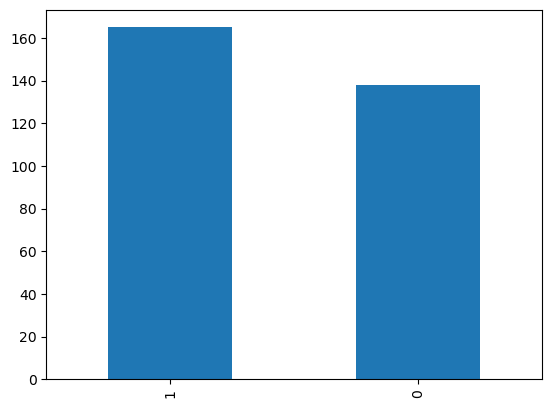

In [40]:
df['target'].value_counts().plot(kind='bar');

In [41]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now, try to learn the patterns between the columns and the target. Get as familiar as you can.

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df['sex'].value_counts()

# male count is twice as much of female count

1    207
0     96
Name: sex, dtype: int64

In [46]:
pd.crosstab(index=df['sex'],columns=df['target'])

target,0,1
sex,,
0,24,72
1,114,93


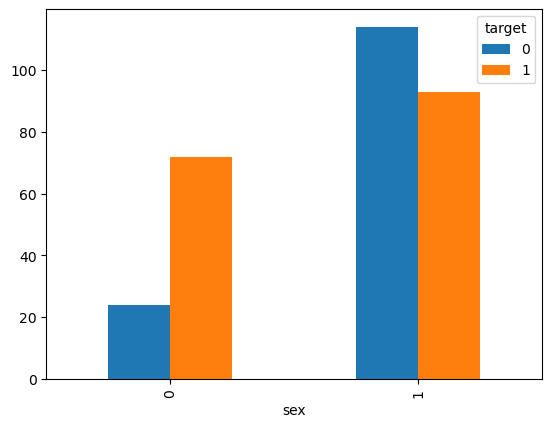

In [47]:
pd.crosstab(index=df['sex'],columns=df['target']).plot(kind='bar');

# from figure, we can see that heart problems in female are more prominent than males accoriding to the data

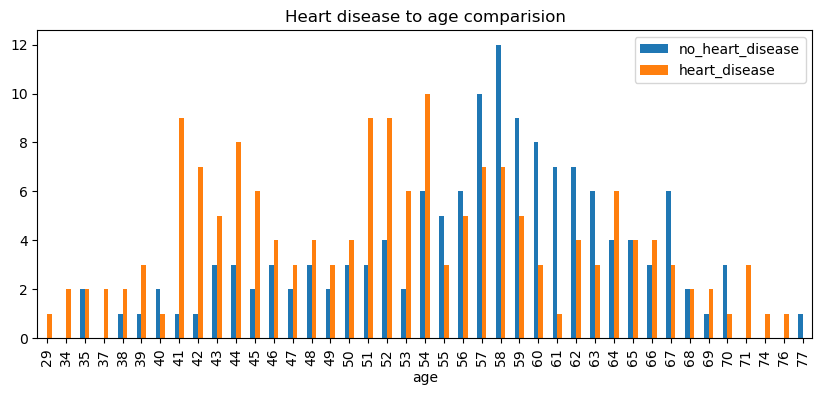

In [48]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(10,4),)
plt.legend(['no_heart_disease','heart_disease'])
plt.title('Heart disease to age comparision');

# from figure, we can see that heart disease is prominent around age 40 to mid 50's

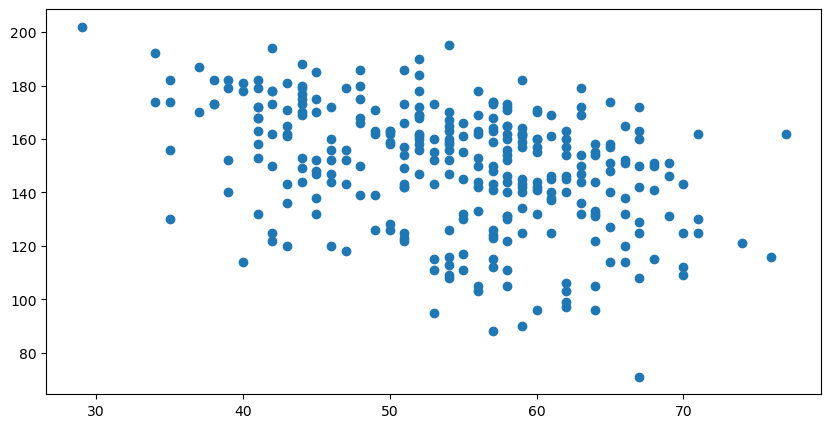

In [49]:
fig,axes = plt.subplots(figsize=(10,5))
axes.scatter(x=df['age'],y=df['thalach'],)

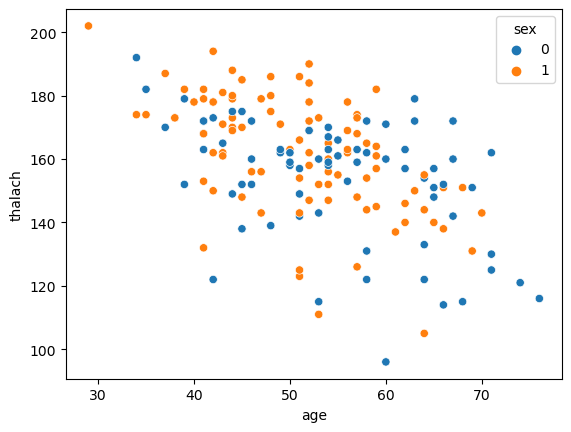

In [50]:
sns.scatterplot(data=df,x=df['age'][df['target']==1],y=df['thalach'][df['target']==1],hue=df['sex']);

# from figure, we can see that thalach(heartrate) decreases when age increases
# plot contains only heart disease patients

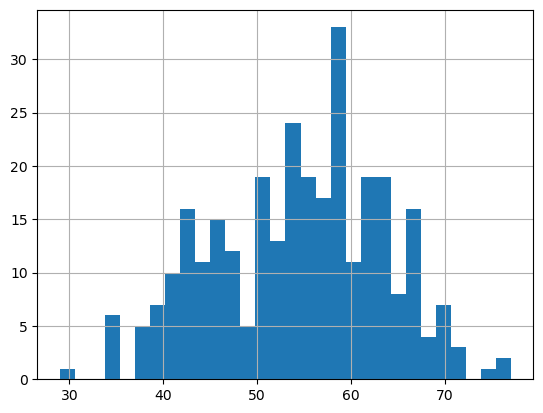

In [51]:
df['age'].hist(bins=30);

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


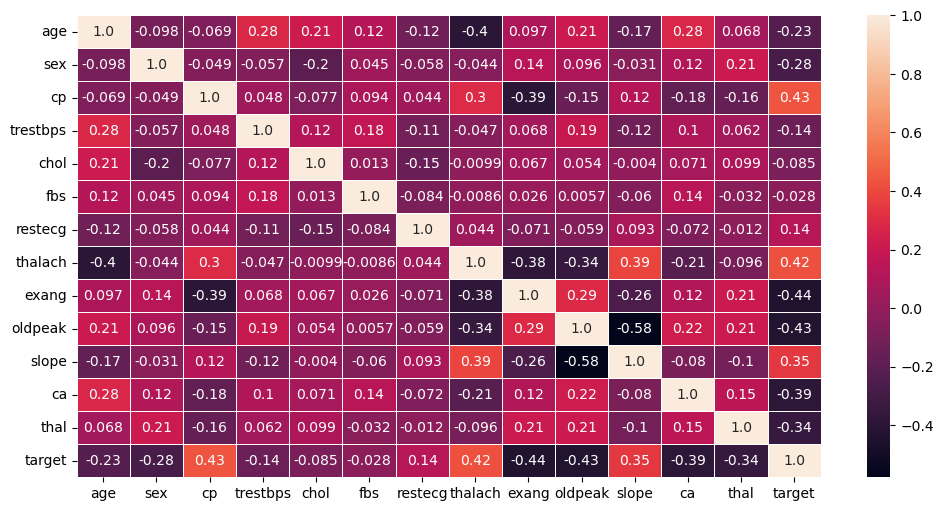

In [53]:
fig,axes = plt.subplots(figsize=(12,6))
axes = sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2');

Now, data being analysed a little, let's model the data for the machine learning algorithm

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
X = df.drop(['target'],axis=1)
y=df['target']

In [56]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
models_dict = {
    'logistic': LogisticRegression(max_iter=1000),
    'kneighbours': KNeighborsClassifier(),
    'forest_clf': RandomForestClassifier()
}

def fit_and_score(models,X_train,y_train,X_test,y_test):
    
    model_score = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [150]:
scores = fit_and_score(models_dict,X_train,y_train,X_test,y_test)

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
model_compare = pd.DataFrame(scores,index=['accuracy'])

In [25]:
model_compare

,logistic,kneighbours,forest_clf
accuracy,0.885246,0.688525,0.852459


<AxesSubplot:>

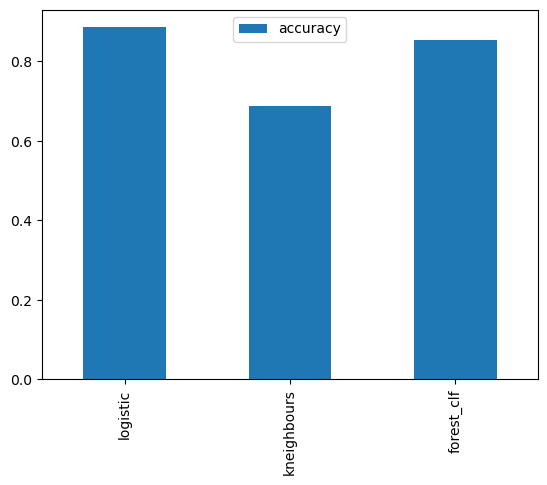

In [26]:
# fig,axes = plt.subplots()
# axes.hist(model_compare);

model_compare.transpose().plot(kind='bar')

let's perform the hyperparameter tuning of the `KNeighbors` classifier.

In [66]:
neighbors = np.arange(1,21)

train_scores = []
test_scores = []
knn_model = KNeighborsClassifier()
for i in neighbors:
    knn_model.set_params(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    train_scores.append(knn_model.score(X_train,y_train))
    test_scores.append(knn_model.score(X_test,y_test))

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

In [28]:
np.array(train_scores)

array([1.        , 0.80991736, 0.77272727, 0.74380165, 0.76033058,
       0.75206612, 0.74380165, 0.7231405 , 0.71900826, 0.69421488,
       0.72727273, 0.69834711, 0.69008264, 0.69421488, 0.68595041,
       0.67355372, 0.68595041, 0.66528926, 0.68181818, 0.66942149])

In [29]:
np.array(test_scores)

array([0.62295082, 0.63934426, 0.6557377 , 0.67213115, 0.68852459,
       0.72131148, 0.70491803, 0.68852459, 0.68852459, 0.70491803,
       0.75409836, 0.73770492, 0.73770492, 0.73770492, 0.68852459,
       0.72131148, 0.68852459, 0.68852459, 0.70491803, 0.6557377 ])

This model couldn't find the patterns much better.

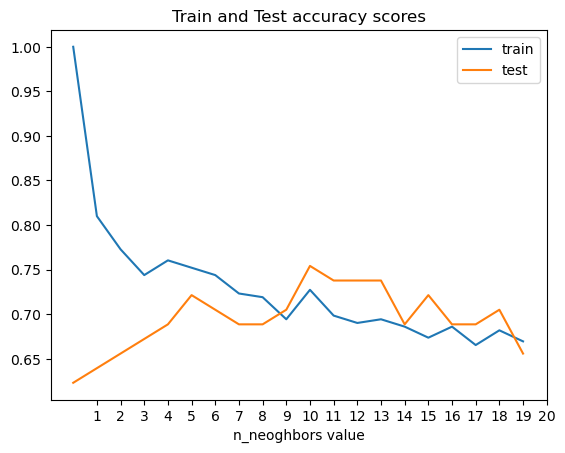

In [30]:
fig,axes = plt.subplots()
axes.plot(train_scores,label='train')
axes.plot(test_scores,label='test')
plt.xlabel("n_neoghbors value")
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.title("Train and Test accuracy scores");

Now, let's tune the hyperparameter of `LogosticRegression` and `RandomForestClassifier` .

In [31]:
log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}

rf_grid = {
    'n_estimators': np.arange(100,1000,50),
    'max_depth': [None,3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

In [32]:
np.random.seed(42)
log_reg_model = LogisticRegression(max_iter=2000)

log_gcv_model= GridSearchCV(estimator=log_reg_model,
                                  param_grid=log_reg_grid,
                                  cv=5)

log_gcv_model.fit(X_train,y_train)
log_gcv_model.score(X_test,y_test)

0.8852459016393442

In [33]:
log_gcv_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

We see, tuning only two parameters of logistic regression didn't yield much of a good result.
Let's tune the random forest classifier.

In [60]:
np.random.seed(42)

forest_clf = RandomForestClassifier()

forest_clf_tuned = RandomizedSearchCV(estimator=forest_clf,param_distributions=rf_grid,
                                     n_iter=10,cv=5)
forest_clf_tuned.fit(X_train,y_train)
forest_clf_tuned.score(X_test,y_test)

0.8688524590163934

In [67]:
forest_clf_tuned.best_params_

{'n_estimators': 150,
 'min_samples_split': 14,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [80]:
y_preds = forest_clf_tuned.predict(X_test)

In [81]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
y_test.to_numpy()

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [122]:
# plot_roc_curve(estimator=forest_clf_tuned,X=X_test,y=y_test)  

# This function is deprecated in later versions.So, use the method below.

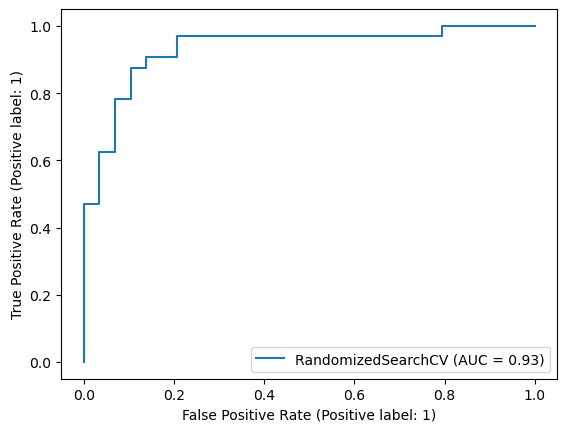

In [78]:
RocCurveDisplay.from_estimator(estimator=forest_clf_tuned,X=X_test,y=y_test);

In [83]:
# RocCurveDisplay.from_predictions(y_test,y_preds);

In [85]:
print(confusion_matrix(y_test,y_preds))

[[24  5]
 [ 3 29]]


In [101]:
def plot_confusion_matrix(y_test,y_preds):
    """
    Plots the confusion matrix using the seaborn heatmap functionality.
    """
    fig,axes = plt.subplots(figsize=(3,2))
    sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,xticklabels=False,yticklabels=False)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values');

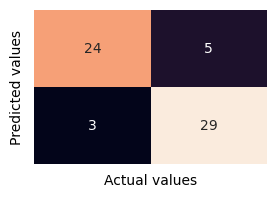

In [100]:
plot_confusion_matrix(y_test,y_preds)

In [102]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



This classification report is true only for the test data we generated earlier.
Now let's check these values using the k-folds validation sets

In [104]:
log_gcv_model.best_params_  # remember logistic regression was the best model

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [106]:
# instantiate a new model with the above parameters

reg_model = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [117]:
# cross validated accuracy

val_acc = cross_val_score(estimator=reg_model,X=X,y=y,scoring='accuracy',cv=5)
print(f'Cross_validated_accuracy_mean:{np.mean(val_acc)*100:.2f}%')

Cross_validated_accuracy_mean:84.80%


In [120]:
# cross validated precision

val_precs = cross_val_score(estimator=reg_model,X=X,y=y,scoring='precision',cv=5)
print(f'Cross_validated_Precision:{np.mean(val_precs):.2f}')

Cross_validated_Precision:0.82


In [121]:
# cross validated recall

val_recall = cross_val_score(estimator=reg_model,X=X,y=y,scoring='recall',cv=5)
print(f'Cross_validated_recall:{np.mean(val_recall):.2f}')

Cross_validated_recall:0.93


In [156]:
# cross validated f1-score (f1-score is the average of precision and recall)

val_f1_score = cross_val_score(estimator=reg_model,X=X,y=y,scoring='f1',cv=5)
print(f'Cross_validated_f1_score:{np.mean(val_f1_score):.2f}')

Cross_validated_f1_score:0.87
